In [392]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

DATA_PATH = 'data/'
filtered_cytosines_freq_path = f'{DATA_PATH}filtered_cytosines_freq.tsv'
filtered_cytosines_coverage_path = f'{DATA_PATH}filtered_cytosines_coverage.tsv'
cpg_islands_annotation_path = f'{DATA_PATH}cpgIslandExt.txt'

# 1. Download Data

In [ ]:
!wget -P {DATA_PATH} https://artyomovlab.wustl.edu/publications/supp_materials/aging/rrbs/filtered_cytosines_freq.tsv.gz
!wget -P {DATA_PATH} https://artyomovlab.wustl.edu/publications/supp_materials/aging/rrbs/filtered_cytosines_coverage.tsv.gz

Unzip data

In [5]:
!gzip -d {filtered_cytosines_freq_path}
!gzip -d {filtered_cytosines_coverage_path}

Download CpG islands annotation

In [ ]:
!wget -P {DATA_PATH} http://hgdownload.cse.ucsc.edu/goldenpath/hg19/database/cpgIslandExt.txt.gz

In [14]:
!gzip -d {cpg_islands_annotation_path}

Read to pandas DataFrame and separate position from chr name

In [264]:
filtered_cytosines_freq = pd.read_csv(filtered_cytosines_freq_path, sep='\t')
filtered_cytosines_coverage = pd.read_csv(filtered_cytosines_coverage_path, sep='\t')
cpg_islands_annotation = pd.read_csv(cpg_islands_annotation_path, sep='\t', header=None)

In [265]:
filtered_cytosines_freq[['chr', 'base']] = filtered_cytosines_freq.chrBase.str.split('.', expand=True)
filtered_cytosines_coverage[['chr', 'base']] = filtered_cytosines_coverage.chrBase.str.split('.', expand=True)

In [266]:
cols = filtered_cytosines_freq.columns.tolist()
cols = cols[-2:] + cols[:-2]
filtered_cytosines_freq = filtered_cytosines_freq[cols]

cols = filtered_cytosines_coverage.columns.tolist()
cols = cols[-2:] + cols[:-2]
filtered_cytosines_coverage = filtered_cytosines_coverage[cols]

In [267]:
filtered_cytosines_freq.base = pd.to_numeric(filtered_cytosines_freq.base)
filtered_cytosines_coverage.base = pd.to_numeric(filtered_cytosines_coverage.base)

In [268]:
filtered_cytosines_freq.sample(5)

,chr,base,chrBase,OD10,OD11,OD12,OD13,OD14,OD15,OD16,...,YD20,YD21,YD2,YD3,YD4,YD5,YD6,YD7,YD8,YD9
265923,chr10,26505034,chr10.26505034,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
130665,chr1,63149397,chr1.63149397,94.737,95.385,100.000,100.000,85.714,100.000,100.000,...,100.000,90.476,100.000,100.000,100.000,100.000,100.000,100.000,100.000,83.333
1193177,chr18,5543054,chr18.5543054,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
71137,chr1,21865056,chr1.21865056,47.826,36.923,42.149,34.615,6.250,35.556,17.647,...,38.571,40.323,45.161,27.778,39.394,42.857,51.852,43.333,59.259,53.571
2473677,chr7,155898333,chr7.155898333,91.667,100.000,100.000,100.000,100.000,100.000,100.000,...,100.000,100.000,78.261,100.000,85.714,80.000,81.818,81.818,86.667,100.000


In [269]:
filtered_cytosines_coverage.sample(5)

,chr,base,chrBase,OD10,OD11,OD12,OD13,OD14,OD15,OD16,...,YD20,YD21,YD2,YD3,YD4,YD5,YD6,YD7,YD8,YD9
447565,chr11,65341801,chr11.65341801,30.0,1.0,8.0,47.0,22.0,29.0,24.0,...,13.0,100.0,25.0,42.0,37.0,32.0,42.0,25.0,19.0,32.0
2344239,chr7,1589295,chr7.1589295,85.0,65.0,72.0,58.0,49.0,62.0,50.0,...,116.0,94.0,46.0,59.0,44.0,63.0,41.0,35.0,37.0,57.0
553624,chr12,51460192,chr12.51460192,9.0,15.0,20.0,7.0,16.0,11.0,17.0,...,21.0,9.0,10.0,3.0,6.0,14.0,10.0,5.0,19.0,8.0
2525074,chr8,47155784,chr8.47155784,89.0,123.0,172.0,76.0,106.0,99.0,79.0,...,106.0,93.0,111.0,68.0,90.0,71.0,80.0,90.0,109.0,96.0
1663909,chr20,31054262,chr20.31054262,64.0,17.0,36.0,86.0,94.0,111.0,65.0,...,49.0,46.0,81.0,100.0,73.0,92.0,102.0,88.0,70.0,77.0


In [270]:
cpg_islands_annotation.sample(5)

,0,1,2,3,4,5,6,7,8,9,10
17334,735,chr20,19738039,19739773,CpG: 128,1734,128,1111,14.8,64.1,0.73
23721,1783,chr6,157040983,157041385,CpG: 39,402,39,279,19.4,69.4,0.81
7932,826,chr15,31664258,31664540,CpG: 36,282,36,203,25.5,72.0,1.03
676,782,chr1,25869893,25871042,CpG: 116,1149,116,810,20.2,70.5,0.82
28994,587,chrX,331056,331299,CpG: 19,243,19,169,15.6,69.5,0.65


# 2. Count CpG islands with CpG cytosines

Сначала для каждого цитозина посчитаем среднее количество по всем донорам (смотрим именно на наличие СpG цитозина isna)

In [282]:
filtered_cytosines_coverage['avg_cpg_cyt'] = filtered_cytosines_coverage.iloc[:, 3:].notna().mean(axis=1)

Далее сохраним датасеты как бедфайлы и пересечем при помощи bedtools

In [283]:
filtered_cytosines_coverage_bed = filtered_cytosines_coverage.copy()
filtered_cytosines_coverage_bed['baseE'] = filtered_cytosines_coverage_bed['base']
filtered_cytosines_coverage_bed[['chr', 'base', 'baseE', 'avg_cpg_cyt']].to_csv(f'{DATA_PATH}filtered_cytosines_coverage.bed', sep='\t', index=None, header=None)

cpg_islands_annotation[[1, 2, 3]].to_csv(f'{DATA_PATH}cpgIslandExt.bed', sep='\t', index=None, header=None)

In [285]:
!conda run bedtools intersect -wa -wb -a {DATA_PATH}cpgIslandExt.bed -b {DATA_PATH}filtered_cytosines_coverage.bed > {DATA_PATH}interseq.bed 

In [288]:
interseq = pd.read_csv(f'{DATA_PATH}interseq.bed', sep='\t', header=None)

Посчитаем среднее по донорам количество цитозинов попавших в каждый остров (сгруппировав и проссумировав по островам)

In [295]:
interseq_sum = interseq[[0, 1, 2, 6]].groupby([0, 1, 2]).sum().reset_index()
interseq_sum.head()

,0,1,2,6
0,chr1,544738,546649,2.800
1,chr1,713984,714547,16.000
2,chr1,762416,763445,23.000
3,chr1,805198,805628,39.000
4,chr1,839694,840619,71.675


График распределения количества СpG цитозинов в островах

<AxesSubplot:xlabel='6', ylabel='Count'>

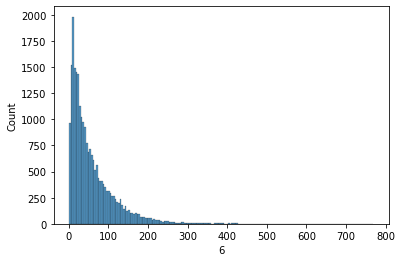

In [298]:
sns.histplot(data=interseq_sum, x=6)

# 3. Рассчет метрики

Сначала рассчитаем метрику для каждого цитозина и донора

In [312]:
metrics_cyt = filtered_cytosines_freq.copy()
metrics_cyt.iloc[:, 3:] = (filtered_cytosines_freq.iloc[:, 3:] / 100) * filtered_cytosines_coverage.iloc[:, 3:]
metrics_cyt.sample(5)

,chr,base,chrBase,OD10,OD11,OD12,OD13,OD14,OD15,OD16,...,YD20,YD21,YD2,YD3,YD4,YD5,YD6,YD7,YD8,YD9
932042,chr16,28835809,chr16.28835809,0.0,1.00036,2.0,0.00000,11.00035,0.0000,0.00000,...,0.00000,0.00000,0.00000,1.00007,0.0,0.00000,0.00000,0.0,1.00035,1.99983
2218092,chr6,7108530,chr6.7108530,0.0,0.00000,0.0,0.00000,0.00000,0.0000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.0,0.00000,0.00000,0.0,0.00000,0.00000
2225674,chr6,15662706,chr6.15662706,0.0,0.00000,0.0,0.00000,0.00000,0.0000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.0,0.00000,0.00000,0.0,0.00000,0.00000
1424693,chr19,50831995,chr19.50831995,2.0,0.00000,0.0,0.00000,0.00000,4.9998,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.0,0.00000,0.00000,0.0,0.00000,0.00000
176833,chr1,159902334,chr1.159902334,54.0,72.00012,67.0,95.99982,43.00000,39.0000,66.00012,...,34.00005,55.99983,90.99958,36.00000,37.0,36.99984,44.99996,35.0,45.99984,39.00015


Теперь сджойним пересечения полученные в предыдущем пункте и таблицу с метрикой и посчитаем метрику для каждого острова

In [319]:
interseq['chrBase'] = interseq[3] + '.' + interseq[4].astype(str)
interseq = interseq.set_index(['chrBase'])

In [321]:
metrics_cyt = metrics_cyt.set_index(['chrBase'])

In [340]:
interseq_metrics = interseq.join(metrics_cyt, how='left')

Посчитаем метрику для каждого острова просуммировав

In [341]:
columns = [0, 1, 2, 6]
columns.extend(interseq_metrics.columns[9:])
interseq_metrics = interseq_metrics[columns]
interseq_metrics_sum = interseq_metrics.groupby([0, 1, 2]).sum().reset_index()
interseq_metrics_sum.head()

,0,1,2,6,OD10,OD11,OD12,OD13,OD14,OD15,...,YD20,YD21,YD2,YD3,YD4,YD5,YD6,YD7,YD8,YD9
0,chr1,544738,546649,2.800,0.00000,51.00001,42.99972,0.00000,26.99982,26.99999,...,0.00000,150.99960,36.99975,0.00000,0.00000,33.99995,31.99980,0.00000,36.00000,5.00000
1,chr1,713984,714547,16.000,0.00000,0.99981,0.00000,1.00001,3.99996,0.00000,...,1.99995,0.00000,0.00000,0.99960,0.00000,0.00000,0.00000,1.99973,1.99994,3.99968
2,chr1,762416,763445,23.000,1.00004,0.00000,0.00000,0.00000,0.99968,0.99970,...,1.00014,0.00000,1.00014,3.99955,0.00000,1.00005,3.00080,11.00019,1.00016,0.99981
3,chr1,805198,805628,39.000,66.00130,62.99972,16.00002,92.99984,60.99716,25.99956,...,87.99936,17.99924,48.99922,104.99937,143.99677,80.99906,138.99883,98.00015,70.00156,142.99874
4,chr1,839694,840619,71.675,37.99999,49.99972,134.00006,53.00018,55.99958,59.99977,...,84.99963,75.00046,79.00038,10.00055,75.00025,56.99953,49.99970,68.99926,64.00020,49.00083


In [342]:
interseq_metrics_sum.shape

(24128, 44)

"Оставьте только те острова, в которых как минимум 4 покрытых СpG", тут можно считать по разному, минимум 4 для каждого донора или минимум 4 хоть для одного донора, я считал минимум 4 по метрике рассчитанной в предыдещем пункте (здесь она аналгично рассчитана в колонке с именем 6)

In [343]:
interseq_metrics_sum_filt = interseq_metrics_sum[interseq_metrics_sum[6] >= 4]
interseq_metrics_sum_filt.shape

(23418, 44)

Переименовываем колонки и сохраняем результат

In [350]:
interseq_metrics_sum_filt_res = interseq_metrics_sum_filt.drop([6], axis=1)
interseq_metrics_sum_filt_res = interseq_metrics_sum_filt_res.rename(columns={0: "chr", 1: "start", 2: "end"})
interseq_metrics_sum_filt_res.head()

,chr,start,end,OD10,OD11,OD12,OD13,OD14,OD15,OD16,...,YD20,YD21,YD2,YD3,YD4,YD5,YD6,YD7,YD8,YD9
1,chr1,713984,714547,0.00000,0.99981,0.00000,1.00001,3.99996,0.00000,0.99994,...,1.99995,0.00000,0.00000,0.99960,0.00000,0.00000,0.00000,1.99973,1.99994,3.99968
2,chr1,762416,763445,1.00004,0.00000,0.00000,0.00000,0.99968,0.99970,0.99969,...,1.00014,0.00000,1.00014,3.99955,0.00000,1.00005,3.00080,11.00019,1.00016,0.99981
3,chr1,805198,805628,66.00130,62.99972,16.00002,92.99984,60.99716,25.99956,61.99945,...,87.99936,17.99924,48.99922,104.99937,143.99677,80.99906,138.99883,98.00015,70.00156,142.99874
4,chr1,839694,840619,37.99999,49.99972,134.00006,53.00018,55.99958,59.99977,28.00082,...,84.99963,75.00046,79.00038,10.00055,75.00025,56.99953,49.99970,68.99926,64.00020,49.00083
5,chr1,844299,845883,785.00036,618.99948,276.00071,330.99974,725.99970,568.99964,988.00321,...,929.00131,391.00072,408.99948,766.99938,814.99969,764.00081,634.00363,1017.99855,735.00243,1150.00059


In [351]:
interseq_metrics_sum_filt_res.to_csv('result/result_table.csv')

# 4. Проведите анализ главных компонент для уровней метилирования в CpG островах

In [367]:
island_metrics = interseq_metrics_sum_filt_res.copy()
island_metrics['island'] = island_metrics.chr + '.' + island_metrics.start.astype(str) + '.' + island_metrics.end.astype(str)
island_metrics = island_metrics.set_index(['island'])
island_metrics = island_metrics.drop(['chr', 'start', 'end'], axis=1)

В начале делаем скейлинг, потом PCA

In [380]:
island_metrics_scaled = StandardScaler().fit_transform(island_metrics)
pca = PCA(n_components=2)
components = pca.fit_transform(island_metrics_scaled)
components = pd.DataFrame(components)

<AxesSubplot:xlabel='0', ylabel='1'>

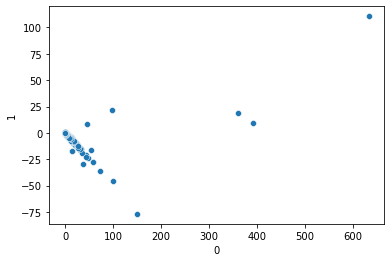

In [383]:
sns.scatterplot(data=components, x=0, y=1)

# 5. Усредните значение по всем донорам и постройте график распределения этой величины

In [389]:
me = island_metrics.mean(axis=1)

(0.0, 1000.0)

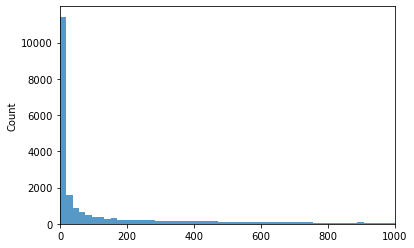

In [393]:
sns.histplot(data=me)
plt.xlim(0, 1000)

# 6. Посчитайте аналогичную метрику среднего уровня метилирования, но не для каждого острова по отдельности, а для объединения всех островов

In [407]:
od = island_metrics.mean(axis=0)[:20].values
yd = island_metrics.mean(axis=0)[20:].values
df = pd.DataFrame([od, yd]).T
df = df.rename({0: 'OD', 1:'YD'}, axis=1)

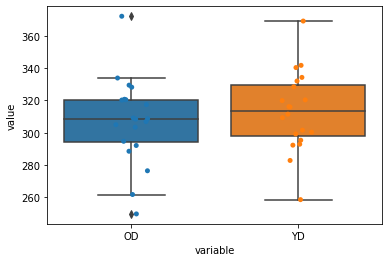

In [410]:
sns.boxplot(x="variable", y="value", data=pd.melt(df))
sns.stripplot(x="variable", y="value", data=pd.melt(df))
plt.show()